PART 1

Random Seed Initialization

In [1]:
# Import required libraries
import numpy as np
import pandas as pd

# Step 1: Initialize random seed using your roll number
roll_number = 8025320061

# NumPy seed must be within 0 to 2**32 - 1
# So we take modulo to make it valid
seed_value = roll_number % (2**32)

np.random.seed(seed_value)

print("Random Seed Initialized:", seed_value)

Random Seed Initialized: 3730352765


Sales Data Generation

In [2]:
# Step 2: Generate random sales data

# Generate a (12 x 4) NumPy array
# 12 months, 4 product categories
# Sales range: 1000 to 5000 units

sales_data = np.random.randint(1000, 5001, size=(12, 4))

print("Generated Sales Data (NumPy Array):")
print(sales_data)

Generated Sales Data (NumPy Array):
[[1040 4034 2055 2324]
 [2880 1701 3350 4500]
 [3568 3632 2076 2791]
 [4779 2737 3042 1606]
 [1699 3834 4063 3982]
 [3046 1443 2629 4279]
 [4649 1547 2641 4514]
 [2518 1521 1774 4434]
 [2103 4629 4603 1693]
 [1145 1011 3379 3468]
 [3062 4255 3781 4424]
 [2786 1390 4218 3452]]


Convert To Pandas Dataframe

In [3]:
# Step 3: Convert NumPy array to Pandas DataFrame

# Define column names
columns = ["Electronics", "Clothing", "Home & Kitchen", "Sports"]

# Define month index
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun",
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

# Create DataFrame
sales_df = pd.DataFrame(sales_data, columns=columns, index=months)

print("\nSales Data as Pandas DataFrame:")
display(sales_df)


Sales Data as Pandas DataFrame:


,Electronics,Clothing,Home & Kitchen,Sports
Jan,1040,4034,2055,2324
Feb,2880,1701,3350,4500
Mar,3568,3632,2076,2791
Apr,4779,2737,3042,1606
May,1699,3834,4063,3982
Jun,3046,1443,2629,4279
Jul,4649,1547,2641,4514
Aug,2518,1521,1774,4434
Sep,2103,4629,4603,1693
Oct,1145,1011,3379,3468


PART 2

Display First 5 Rows & Summary Statistics

In [4]:
# Display first 5 rows
print("First 5 Rows:")
display(sales_df.head())

# Summary statistics
print("\nSummary Statistics:")
display(sales_df.describe())

First 5 Rows:


,Electronics,Clothing,Home & Kitchen,Sports
Jan,1040,4034,2055,2324
Feb,2880,1701,3350,4500
Mar,3568,3632,2076,2791
Apr,4779,2737,3042,1606
May,1699,3834,4063,3982



Summary Statistics:


,Electronics,Clothing,Home & Kitchen,Sports
count,12.000000,12.000000,12.000000,12.000000
mean,2772.916667,2644.500000,3134.250000,3455.583333
std,1193.397705,1345.157274,922.501059,1100.053260
min,1040.000000,1011.000000,1774.000000,1606.000000
25%,2002.000000,1501.500000,2490.750000,2674.250000
50%,2833.000000,2219.000000,3196.000000,3725.000000
75%,3188.500000,3884.000000,3851.500000,4426.500000
max,4779.000000,4629.000000,4603.000000,4514.000000


Total Sales Per Category & Per Month

In [5]:
# Total sales per category (column-wise sum)
total_per_category = sales_df.sum()

print("Total Sales Per Category:")
display(total_per_category)

# Total sales per month (row-wise sum)
total_per_month = sales_df.sum(axis=1)

print("\nTotal Sales Per Month:")
display(total_per_month)

Total Sales Per Category:


,0
Electronics,33275
Clothing,31734
Home & Kitchen,37611
Sports,41467



Total Sales Per Month:


,0
Jan,9453
Feb,12431
Mar,12067
Apr,12164
May,13578
Jun,11397
Jul,13351
Aug,10247
Sep,13028
Oct,9003


Average Sales Growth Between Consecutive Months (Each Category)

In [6]:
# Percentage growth between consecutive months
monthly_growth = sales_df.pct_change() * 100

# Average growth for each category
avg_growth = monthly_growth.mean()

print("Average Monthly Growth (%) for Each Category:")
display(avg_growth)

Average Monthly Growth (%) for Each Category:


,0
Electronics,32.068090
Clothing,35.818865
Home & Kitchen,17.613622
Sports,20.085490


Add Total Sales and Growth Rate Columns

In [7]:
# Add Total Sales column
sales_df["Total Sales"] = sales_df.sum(axis=1)

# Add Growth Rate column (percentage change of Total Sales)
sales_df["Growth Rate (%)"] = sales_df["Total Sales"].pct_change() * 100

print("Updated DataFrame with Total Sales & Growth Rate:")
display(sales_df)

Updated DataFrame with Total Sales & Growth Rate:


,Electronics,Clothing,Home & Kitchen,Sports,Total Sales,Growth Rate (%)
Jan,1040,4034,2055,2324,9453,NaN
Feb,2880,1701,3350,4500,12431,31.503226
Mar,3568,3632,2076,2791,12067,-2.928163
Apr,4779,2737,3042,1606,12164,0.803845
May,1699,3834,4063,3982,13578,11.624466
Jun,3046,1443,2629,4279,11397,-16.062749
Jul,4649,1547,2641,4514,13351,17.144863
Aug,2518,1521,1774,4434,10247,-23.249195
Sep,2103,4629,4603,1693,13028,27.139651
Oct,1145,1011,3379,3468,9003,-30.894995


Apply Randomized Discount

In [8]:
roll_number = 8025320061

if roll_number % 2 == 0:
    # Even roll number → 10% discount to Electronics
    sales_df["Electronics"] = sales_df["Electronics"] * 0.90
    print("10% Discount Applied to Electronics")
else:
    # Odd roll number → 15% discount to Clothing
    sales_df["Clothing"] = sales_df["Clothing"] * 0.85
    print("15% Discount Applied to Clothing")

display(sales_df)

15% Discount Applied to Clothing


,Electronics,Clothing,Home & Kitchen,Sports,Total Sales,Growth Rate (%)
Jan,1040,3428.90,2055,2324,9453,NaN
Feb,2880,1445.85,3350,4500,12431,31.503226
Mar,3568,3087.20,2076,2791,12067,-2.928163
Apr,4779,2326.45,3042,1606,12164,0.803845
May,1699,3258.90,4063,3982,13578,11.624466
Jun,3046,1226.55,2629,4279,11397,-16.062749
Jul,4649,1314.95,2641,4514,13351,17.144863
Aug,2518,1292.85,1774,4434,10247,-23.249195
Sep,2103,3934.65,4603,1693,13028,27.139651
Oct,1145,859.35,3379,3468,9003,-30.894995


PART 3

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Improve plot style
sns.set(style="whitegrid")

Line Plot Monthly Sales Trend

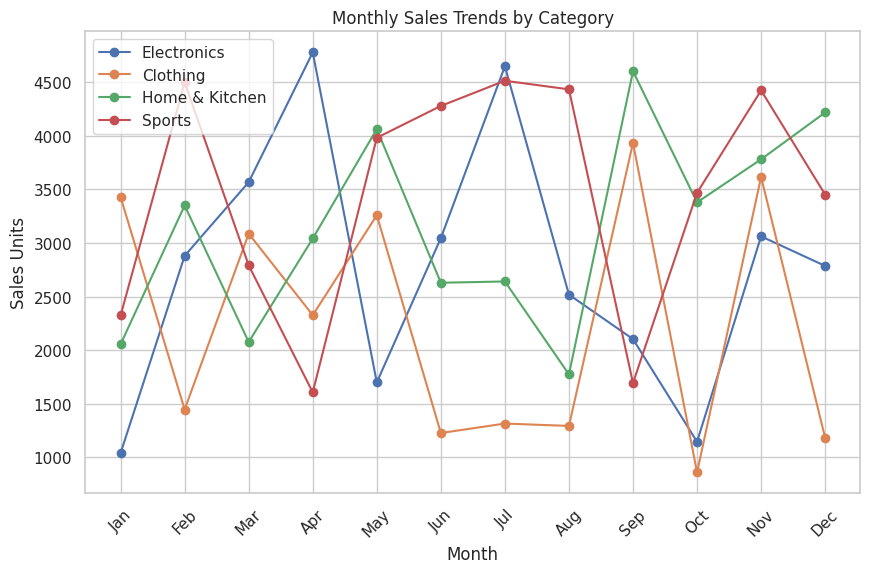

In [10]:
plt.figure(figsize=(10,6))

for column in ["Electronics", "Clothing", "Home & Kitchen", "Sports"]:
    plt.plot(sales_df.index, sales_df[column], marker='o', label=column)

plt.title("Monthly Sales Trends by Category")
plt.xlabel("Month")
plt.ylabel("Sales Units")
plt.legend()
plt.xticks(rotation=45)
plt.show()

Box Plot – Sales Distribution Per Category

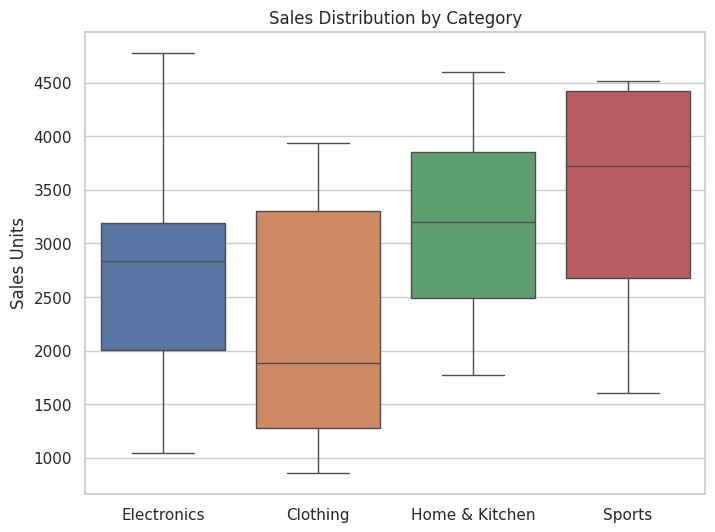

In [11]:
plt.figure(figsize=(8,6))

sns.boxplot(data=sales_df[["Electronics", "Clothing", "Home & Kitchen", "Sports"]])

plt.title("Sales Distribution by Category")
plt.ylabel("Sales Units")
plt.show()

QUESTION 2

In [12]:
import numpy as np

array = np.array([[1, -2, 3],
                  [-4, 5, -6]])

print("Original Array:\n", array)

Original Array:
 [[ 1 -2  3]
 [-4  5 -6]]


i) Element-wise Absolute Value

In [13]:
abs_array = np.abs(array)
print("Element-wise Absolute Value:\n", abs_array)

Element-wise Absolute Value:
 [[1 2 3]
 [4 5 6]]


ii) 25th, 50th, 75th Percentiles

A) For Flattened Array

In [14]:
flat = array.flatten()

percentiles_flat = np.percentile(flat, [25, 50, 75])
print("Percentiles (Flattened Array):", percentiles_flat)

Percentiles (Flattened Array): [-3.5 -0.5  2.5]


B) For Each Column

In [15]:
percentiles_columns = np.percentile(array, [25, 50, 75], axis=0)
print("Percentiles (Each Column):\n", percentiles_columns)

Percentiles (Each Column):
 [[-2.75 -0.25 -3.75]
 [-1.5   1.5  -1.5 ]
 [-0.25  3.25  0.75]]


C) For Each Row

In [16]:
percentiles_rows = np.percentile(array, [25, 50, 75], axis=1)
print("Percentiles (Each Row):\n", percentiles_rows)

Percentiles (Each Row):
 [[-0.5 -5. ]
 [ 1.  -4. ]
 [ 2.   0.5]]


iii) Mean, Median, Standard Deviation

A) Flattened Array

In [17]:
print("Flattened Array Statistics:")
print("Mean:", np.mean(flat))
print("Median:", np.median(flat))
print("Standard Deviation:", np.std(flat))

Flattened Array Statistics:
Mean: -0.5
Median: -0.5
Standard Deviation: 3.8622100754188224


B) Each Column

In [18]:
print("\nColumn-wise Statistics:")
print("Mean:", np.mean(array, axis=0))
print("Median:", np.median(array, axis=0))
print("Standard Deviation:", np.std(array, axis=0))


Column-wise Statistics:
Mean: [-1.5  1.5 -1.5]
Median: [-1.5  1.5 -1.5]
Standard Deviation: [2.5 3.5 4.5]


C) Each Row

In [19]:
print("\nRow-wise Statistics:")
print("Mean:", np.mean(array, axis=1))
print("Median:", np.median(array, axis=1))
print("Standard Deviation:", np.std(array, axis=1))


Row-wise Statistics:
Mean: [ 0.66666667 -1.66666667]
Median: [ 1. -4.]
Standard Deviation: [2.05480467 4.78423336]


QUESTION 3

In [20]:
a = np.array([-1.8, -1.6, -0.5, 0.5, 1.6, 1.8, 3.0])

print("Original Array:", a)

Original Array: [-1.8 -1.6 -0.5  0.5  1.6  1.8  3. ]


Floor

In [21]:
print("Floor:", np.floor(a))

Floor: [-2. -2. -1.  0.  1.  1.  3.]


Ceiling

In [22]:
print("Ceiling:", np.ceil(a))

Ceiling: [-1. -1. -0.  1.  2.  2.  3.]


Truncated Values

In [23]:
print("Truncated:", np.trunc(a))

Truncated: [-1. -1. -0.  0.  1.  1.  3.]


Rounded Values

In [24]:
print("Rounded:", np.round(a))

Rounded: [-2. -2. -0.  0.  2.  2.  3.]


QUESTION 4

In [25]:
# Example list
my_list = [10, 20, 30, 40]

print("Original List:", my_list)

# Positions to swap
i = 1
j = 3

# Using temporary variable
temp = my_list[i]
my_list[i] = my_list[j]
my_list[j] = temp

print("List After Swapping:", my_list)

Original List: [10, 20, 30, 40]
List After Swapping: [10, 40, 30, 20]


QUESTION 5

In [26]:
# Example set
my_set = {10, 20, 30, 40}

print("Original Set:", my_set)

# Convert set to list
temp_list = list(my_set)

# Swap elements at index 0 and 1
temp = temp_list[0]
temp_list[0] = temp_list[1]
temp_list[1] = temp

# Convert back to set
my_set = set(temp_list)

print("Set After Swapping:", my_set)

Original Set: {40, 10, 20, 30}
Set After Swapping: {40, 10, 20, 30}
